#### INFO_511_AdamsT_AE05_V1



In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

degrees = pd.read_csv(r"C:\Users\ToddAdams\Documents\UA PhD Program\INFO 511 -Foundations Data Science\INFO 511 - Juypter Notebooks\info-511-s25\ae\data\degrees.csv")

degrees.head()


,degree,2019,2020,2021,2022,2023
0,Information Science & eSociety (BA),63.0,61.0,67.0,71,38
1,Information Science (BS),NaN,NaN,NaN,16,57
2,Information (PhD),2.0,3.0,1.0,1,1
3,Library & Information Science (MA),47.0,57.0,72.0,42,58
4,Information (MS),8.0,10.0,13.0,5,2


#### Pivot the degrees data frame longer such that each row represents a degree type / year combination and year and number of graduates for that year are columns in the data frame.

In [34]:
degrees_long = degrees.melt(id_vars=["degree"], var_name="year", value_name="n")# Transform data into long format
degrees_long.head()# Display first few rows


,degree,year,n
0,Information Science & eSociety (BA),2019,63.0
1,Information Science (BS),2019,NaN
2,Information (PhD),2019,2.0
3,Library & Information Science (MA),2019,47.0
4,Information (MS),2019,8.0


####  Question, What is the type of the 'year' variable? Why? What should it be?

In [35]:
print(degrees_long.dtypes)# prints data types

degree     object
year       object
n         float64
dtype: object


#### ANSWER: The variable 'year' is an object and it should be an integer

#### Start over with pivoting, and this time also make sure year is a numberical variable in the resulting dataframe.

In [36]:
degrees_long = degrees.melt(id_vars=["degree"], var_name="year", value_name="n")# pivot data into a long format
degrees_long["year"] = degrees_long["year"].astype(int)# Convert 'year' from an object to an integer
print(degrees_long.dtypes)# prints the data types
degrees_long.head()# displays the first few rows

degree     object
year        int64
n         float64
dtype: object


,degree,year,n
0,Information Science & eSociety (BA),2019,63.0
1,Information Science (BS),2019,NaN
2,Information (PhD),2019,2.0
3,Library & Information Science (MA),2019,47.0
4,Information (MS),2019,8.0


#### What would an NA mean in this context?
#### ANSWER: It is unlikely that the data is missing. It is more likely that in a particular year, NA means that nobody graduated that year with that degree.

#### Add onto your pipeline that you started with pivoting and convert NAs in n to 0s

In [37]:
degrees_long = degrees.melt(id_vars=["degree"], var_name="year", value_name="n")# pivot data into a long format
degrees_long["year"] = degrees_long["year"].astype(int)# Convert 'year' from an object to an integer
degrees_long["n"] = degrees_long["n"].fillna(0)# replace missing values with '0'
print(degrees_long.dtypes)# prints the data types
degrees_long.head()# displays the first few rows

degree     object
year        int64
n         float64
dtype: object


,degree,year,n
0,Information Science & eSociety (BA),2019,63.0
1,Information Science (BS),2019,0.0
2,Information (PhD),2019,2.0
3,Library & Information Science (MA),2019,47.0
4,Information (MS),2019,8.0


"""In our plot the degree types are BA, BS, MA, MS, and PhD. This information is in our dataset,
in the degree column, but this column also has additional characters we don't need.
Create a new column called 'degree_type' with levels BA, BS, MA, MS, and PhD (in this order)
based on degree. Do thisby adding on to your pipeline from earlier."""

In [38]:
degrees_long = degrees.melt(id_vars=["degree"], var_name="year", value_name="n")# pivot data into a long format

degrees_long["year"] = degrees_long["year"].astype(int)# Convert 'year' from an object to an integer

degrees_long["n"] = degrees_long["n"].fillna(0)# replace missing values with '0'

degree_pattern = r"\b(BA|BS|MA|MS|PhD)\b"# create a regex pattern to extract the degree types

degrees_long["degree_type"] = degrees_long["degree"].str.extract(degree_pattern)# Creates the column 'degree_type' and extracts the degree type from the 'degree' column

degree_order = ["BA", "BS", "MA", "MS", "PhD"]# creates the variable 'degree_order' and creates the order in the set

degrees_long["degree_type"] = pd.Categorical(degrees_long["degree_type"], categories=degree_order, ordered=True)# makes sure that 'degree_type' is treated as a categorical variable in the correct order


""" Now we start making our plot, but let's not get too fancy right away. Create the following plot,
which will serve as the 'first draft' on our way to our goal. Do this by adding on to your pipeline from earlier."""

C:\Users\ToddAdams\AppData\Local\Temp\ipykernel_16592\183985601.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=degrees_long, x="year", y="n", hue="degree_type", ci=None)# use the function 'lineplot' and set the x and y axes, do not use confidence intervals


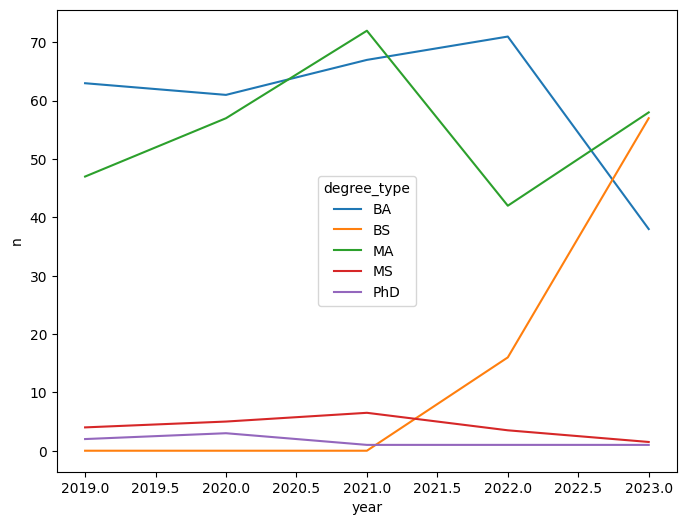

In [39]:
degrees_long = degrees.melt(id_vars=["degree"], var_name="year", value_name="n")# pivot data into a long format

degrees_long["year"] = degrees_long["year"].astype(int)# Convert 'year' from an object to an integer

degrees_long["n"] = degrees_long["n"].fillna(0)# replace missing values with '0'

degree_pattern = r"\b(BA|BS|MA|MS|PhD)\b"# create a regex pattern to extract the degree types

degrees_long["degree_type"] = degrees_long["degree"].str.extract(degree_pattern)# Creates the column 'degree_type' and extracts the degree type from the 'degree' column

degree_order = ["BA", "BS", "MA", "MS", "PhD"]# creates the variable 'degree_order' and creates the order in the set

degrees_long["degree_type"] = pd.Categorical(degrees_long["degree_type"], categories=degree_order, ordered=True)# makes sure that 'degree_type' is treated as a categorical variable in the correct order

plt.figure(figsize=(8, 6))# use the function 'figure' and set the figure size
sns.lineplot(data=degrees_long, x="year", y="n", hue="degree_type", ci=None)# use the function 'lineplot' and set the x and y axes, do not use confidence intervals

plt.xlabel("year")
plt.ylabel("n")

plt.show()

"""What aspects of the plot need to be updated to go from the draft you created above to the goal plot at the beginning of this application exercise?"""

"""ANSWER: 1. Add title - College of Information Science degrees of the years Academic years 2019-2023,
2. add x-axis title - Graudation year
3. add y-axis title - Number of students graduating
4. add grid lines
5. add round data points to illustrate data
6. change line colors
7. change years to remove decimal points
"""

"""Update x-axis scale such that the years displayed go from 2019 to 2023 in unique years. Do this by adding on to your pipeline from earlier"""

C:\Users\ToddAdams\AppData\Local\Temp\ipykernel_16592\490660001.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=degrees_long, x="year", y="n", hue="degree_type", ci=None)# use the function 'lineplot' and set the x and y axes, do not use confidence intervals


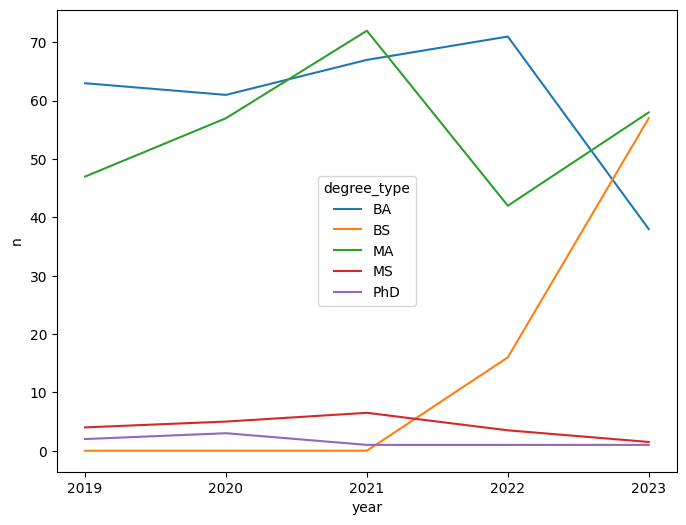

In [40]:
degrees_long = degrees.melt(id_vars=["degree"], var_name="year", value_name="n")# pivot data into a long format

degrees_long["year"] = degrees_long["year"].astype(int)# Convert 'year' from an object to an integer

degrees_long["n"] = degrees_long["n"].fillna(0)# replace missing values with '0'

degree_pattern = r"\b(BA|BS|MA|MS|PhD)\b"# create a regex pattern to extract the degree types

degrees_long["degree_type"] = degrees_long["degree"].str.extract(degree_pattern)# Creates the column 'degree_type' and extracts the degree type from the 'degree' column

degree_order = ["BA", "BS", "MA", "MS", "PhD"]# creates the variable 'degree_order' and creates the order in the set

degrees_long["degree_type"] = pd.Categorical(degrees_long["degree_type"], categories=degree_order, ordered=True)# makes sure that 'degree_type' is treated as a categorical variable in the correct order

plt.figure(figsize=(8, 6))# use the function 'figure' and set the figure size
sns.lineplot(data=degrees_long, x="year", y="n", hue="degree_type", ci=None)# use the function 'lineplot' and set the x and y axes, do not use confidence intervals

plt.xticks(degrees_long["year"].unique())# This uses the function 'unique' to remove the decimal point from year
plt.ylabel("n")

plt.show()

""" Update the line colors using the following level-color assignments. Once again, do this by adding on to your pipeline from earlier."""

C:\Users\ToddAdams\AppData\Local\Temp\ipykernel_16592\1301629925.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=degrees_long, x="year", y="n", hue="degree_type", ci=None, palette=degree_colors)# added the palette custom colors to the sns lineplot


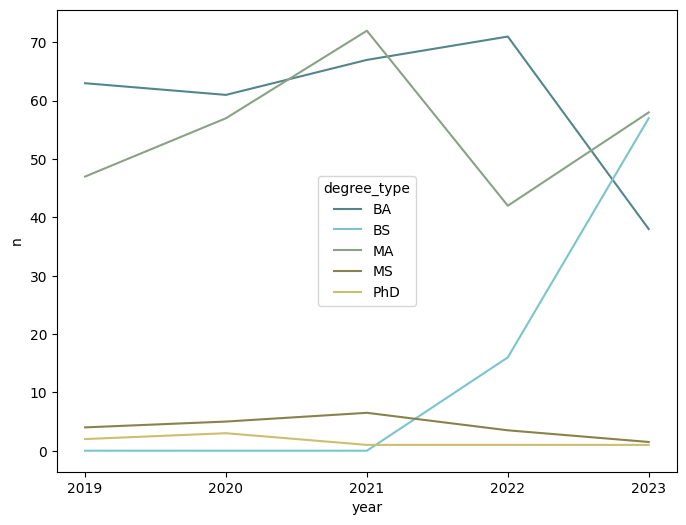

In [41]:
degrees_long = degrees.melt(id_vars=["degree"], var_name="year", value_name="n")# pivot data into a long format

degrees_long["year"] = degrees_long["year"].astype(int)# Convert 'year' from an object to an integer

degrees_long["n"] = degrees_long["n"].fillna(0)# replace missing values with '0'

degree_pattern = r"\b(BA|BS|MA|MS|PhD)\b"# create a regex pattern to extract the degree types

degrees_long["degree_type"] = degrees_long["degree"].str.extract(degree_pattern)# Creates the column 'degree_type' and extracts the degree type from the 'degree' column

degree_order = ["BA", "BS", "MA", "MS", "PhD"]# creates the variable 'degree_order' and creates the order in the set

degrees_long["degree_type"] = pd.Categorical(degrees_long["degree_type"], categories=degree_order, ordered=True)# makes sure that 'degree_type' is treated as a categorical variable in the correct order

degree_colors = {"BA": "#53868B",# create color palette dictionary
                 "BS": "#7AC5CD",
                 "MA": "#89a285",
                 "MS": "#8B814C",
                 "PhD": "#CDBE70"}

plt.figure(figsize=(8, 6))# use the function 'figure' and set the figure size
sns.lineplot(data=degrees_long, x="year", y="n", hue="degree_type", ci=None, palette=degree_colors)# added the palette custom colors to the sns lineplot

plt.xticks(degrees_long["year"].unique())# This uses the function 'unique' to remove the decimal point from year
plt.ylabel("n")

plt.show()

####Update the plot labels (title, x, and y) and use sns.set_style("white_grid"). Add to pipeline###

C:\Users\ToddAdams\AppData\Local\Temp\ipykernel_16592\2476660290.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=degrees_long, x="year", y="n", hue="degree_type", ci=None, palette=degree_colors)# added the palette custom colors to the sns lineplot


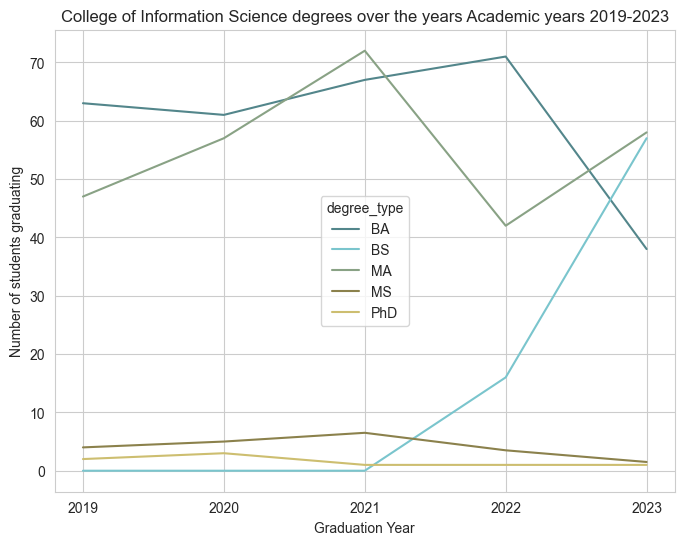

In [ ]:
degrees_long = degrees.melt(id_vars=["degree"], var_name="year", value_name="n")# pivot data into a long format

degrees_long["year"] = degrees_long["year"].astype(int)# Convert 'year' from an object to an integer

degrees_long["n"] = degrees_long["n"].fillna(0)# replace missing values with '0'

degree_pattern = r"\b(BA|BS|MA|MS|PhD)\b"# create a regex pattern to extract the degree types

degrees_long["degree_type"] = degrees_long["degree"].str.extract(degree_pattern)# Creates the column 'degree_type' and extracts the degree type from the 'degree' column

degree_order = ["BA", "BS", "MA", "MS", "PhD"]# creates the variable 'degree_order' and creates the order in the set

degrees_long["degree_type"] = pd.Categorical(degrees_long["degree_type"], categories=degree_order, ordered=True)# makes sure that 'degree_type' is treated as a categorical variable in the correct order

degree_colors = {"BA": "#53868B",# create color palette dictionary
                 "BS": "#7AC5CD",
                 "MA": "#89a285",
                 "MS": "#8B814C",
                 "PhD": "#CDBE70"}

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))# use the function 'figure' and set the figure size
sns.lineplot(data=degrees_long, x="year", y="n", hue="degree_type", ci=None, palette=degree_colors, marker="o")# added the palette custom colors and a dot to the datapoint to the sns lineplot

plt.xticks(degrees_long["year"].unique())# This uses the function 'unique' to remove the decimal point from year
plt.ylabel("n")

plt.title("College of Information Science degrees over the years Academic years 2019-2023")
plt.xlabel("Graduation Year")
plt.ylabel("Number of students graduating")

plt.show()